In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('D:/PythonProjects/DATA7703/Project/Ash/df_reg_imp.csv')   #load your data here
#delete id column
# df = df.drop('Id',axis=1)
df.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,LotFrontage,MasVnrType,MasVnrArea,Electrical,GarageYrBlt,SalePrice
0,60,3,8450,1,1,3,3,0,4,0,...,2,2008,8,4,65.0,1,196.0,4,2003.0,208500
1,20,3,9600,1,1,3,3,0,2,0,...,5,2007,8,4,80.0,2,0.0,4,1976.0,181500
2,60,3,11250,1,1,0,3,0,4,0,...,9,2008,8,4,68.0,1,162.0,4,2001.0,223500
3,70,3,9550,1,1,0,3,0,0,0,...,2,2006,8,0,60.0,2,0.0,4,1998.0,140000
4,60,3,14260,1,1,0,3,0,2,0,...,12,2008,8,4,84.0,1,350.0,4,2000.0,250000


In [6]:
#Summary statistics for sale price
print(df['SalePrice'].describe())

#we see that sale price has still 0 values ... Ash ....
print('# of rows to be dropped:',df.loc[df['SalePrice'] == 0].shape[0])  #it is only 1 row
#drop that row
df = df.loc[df['SalePrice']!= 0]
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
# of rows to be dropped: 0
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [4]:
# For clustering i would propose making a clusters: low price, medium price and high price
# based on the 25%, 75% quantiles
# low price: price less than 152
# medium price: price less than 423
# high price: price more than 423


In [7]:
#find the variables with highest correlation with price
correlation_values = []
correlation_names = []
for var in list(df.columns.values):
    vector1 = df[var].to_numpy()
    vector2 = df['SalePrice'].to_numpy()
    correlation_values.append(np.corrcoef(vector1,vector2)[0,1])
    correlation_names.append(var)

In [8]:
#organise into a table
correlation_table = np.column_stack((correlation_names, correlation_values))
correlation_table = correlation_table[correlation_table[:,1].astype(float).argsort()]
print(correlation_table[correlation_table[:,1].astype(float).argsort()])

[['ExterQual' '-0.636883694399113']
 ['BsmtQual' '-0.5937339191038188']
 ['KitchenQual' '-0.5891887782994203']
 ['GarageFinish' '-0.4256842542080423']
 ['GarageType' '-0.41528306845290375']
 ['HeatingQC' '-0.40017754316290066']
 ['BsmtExposure' '-0.30904283506600466']
 ['LotShape' '-0.2555798704871221']
 ['MSZoning' '-0.16687220265320615']
 ['KitchenAbvGr' '-0.13590737084214108']
 ['EnclosedPorch' '-0.1285779579259565']
 ['PoolQC' '-0.12606973863532905']
 ['Heating' '-0.09881207599757645']
 ['BsmtFinType1' '-0.09873436814721034']
 ['FireplaceQu' '-0.09717638681344774']
 ['BldgType' '-0.08559060818352937']
 ['MSSubClass' '-0.08428413512659522']
 ['OverallCond' '-0.077855894048678']
 ['LotConfig' '-0.06739602315941748']
 ['MiscFeature' '-0.06631614899148094']
 ['SaleType' '-0.05491147712871206']
 ['YrSold' '-0.02892258516873029']
 ['LowQualFinSF' '-0.025606130000679565']
 ['MiscVal' '-0.02118957964030324']
 ['BsmtHalfBath' '-0.01684415429735901']
 ['Utilities' '-0.014314296147248797']
 [

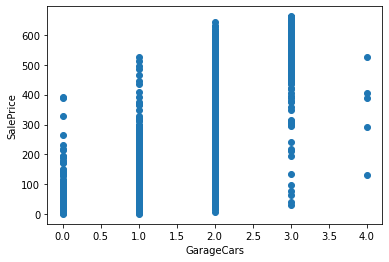

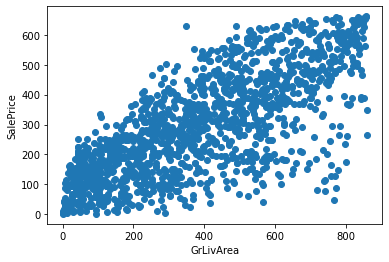

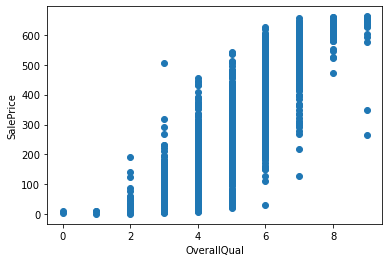

In [7]:
#scatter plots of entries with highest correlations
for var in correlation_table[-4:-1,0]:
    fig = plt.figure()
    vector1 = df[var].to_numpy()
    vector2 = df['SalePrice'].to_numpy()
    plt.scatter(vector1,vector2)
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    

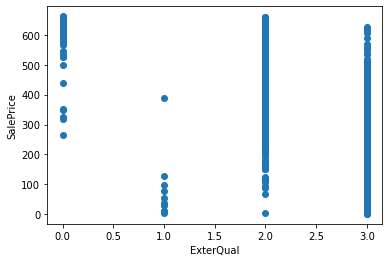

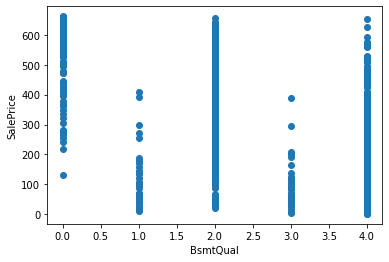

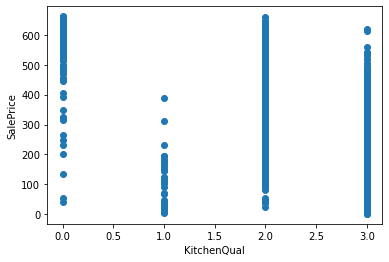

In [8]:
#scatter plots of entries with highest negative correlations
for var in correlation_table[0:3,0]:
    fig = plt.figure()
    vector1 = df[var].to_numpy()
    vector2 = df['SalePrice'].to_numpy()
    plt.scatter(vector1,vector2)
    plt.xlabel(var)
    plt.ylabel('SalePrice')

In [9]:
#The variables OverallQual and GrLivArea seem good predictors for the price, the trend on the other variables is not clear

variance explained 1d:  0.42911373203150593
variance explained 2d:  0.63103708646945


Text(0, 0.5, 'Variance explained')

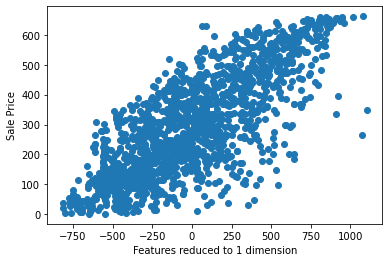

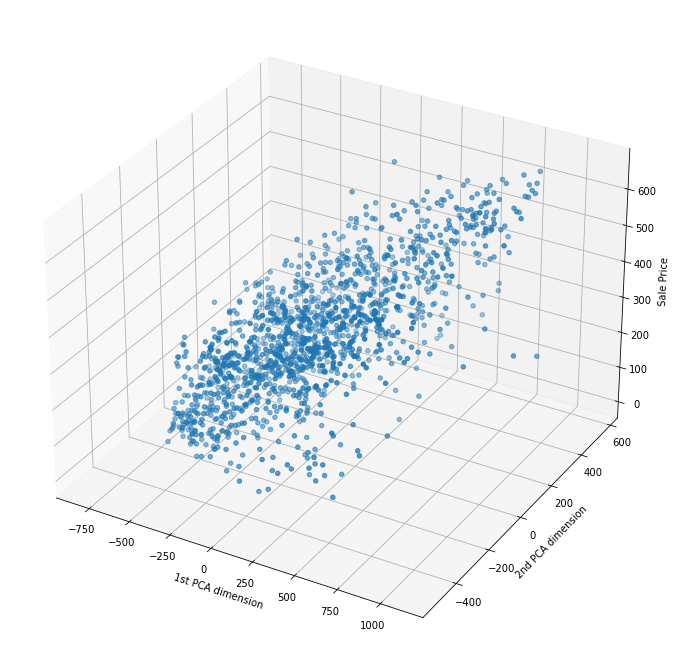

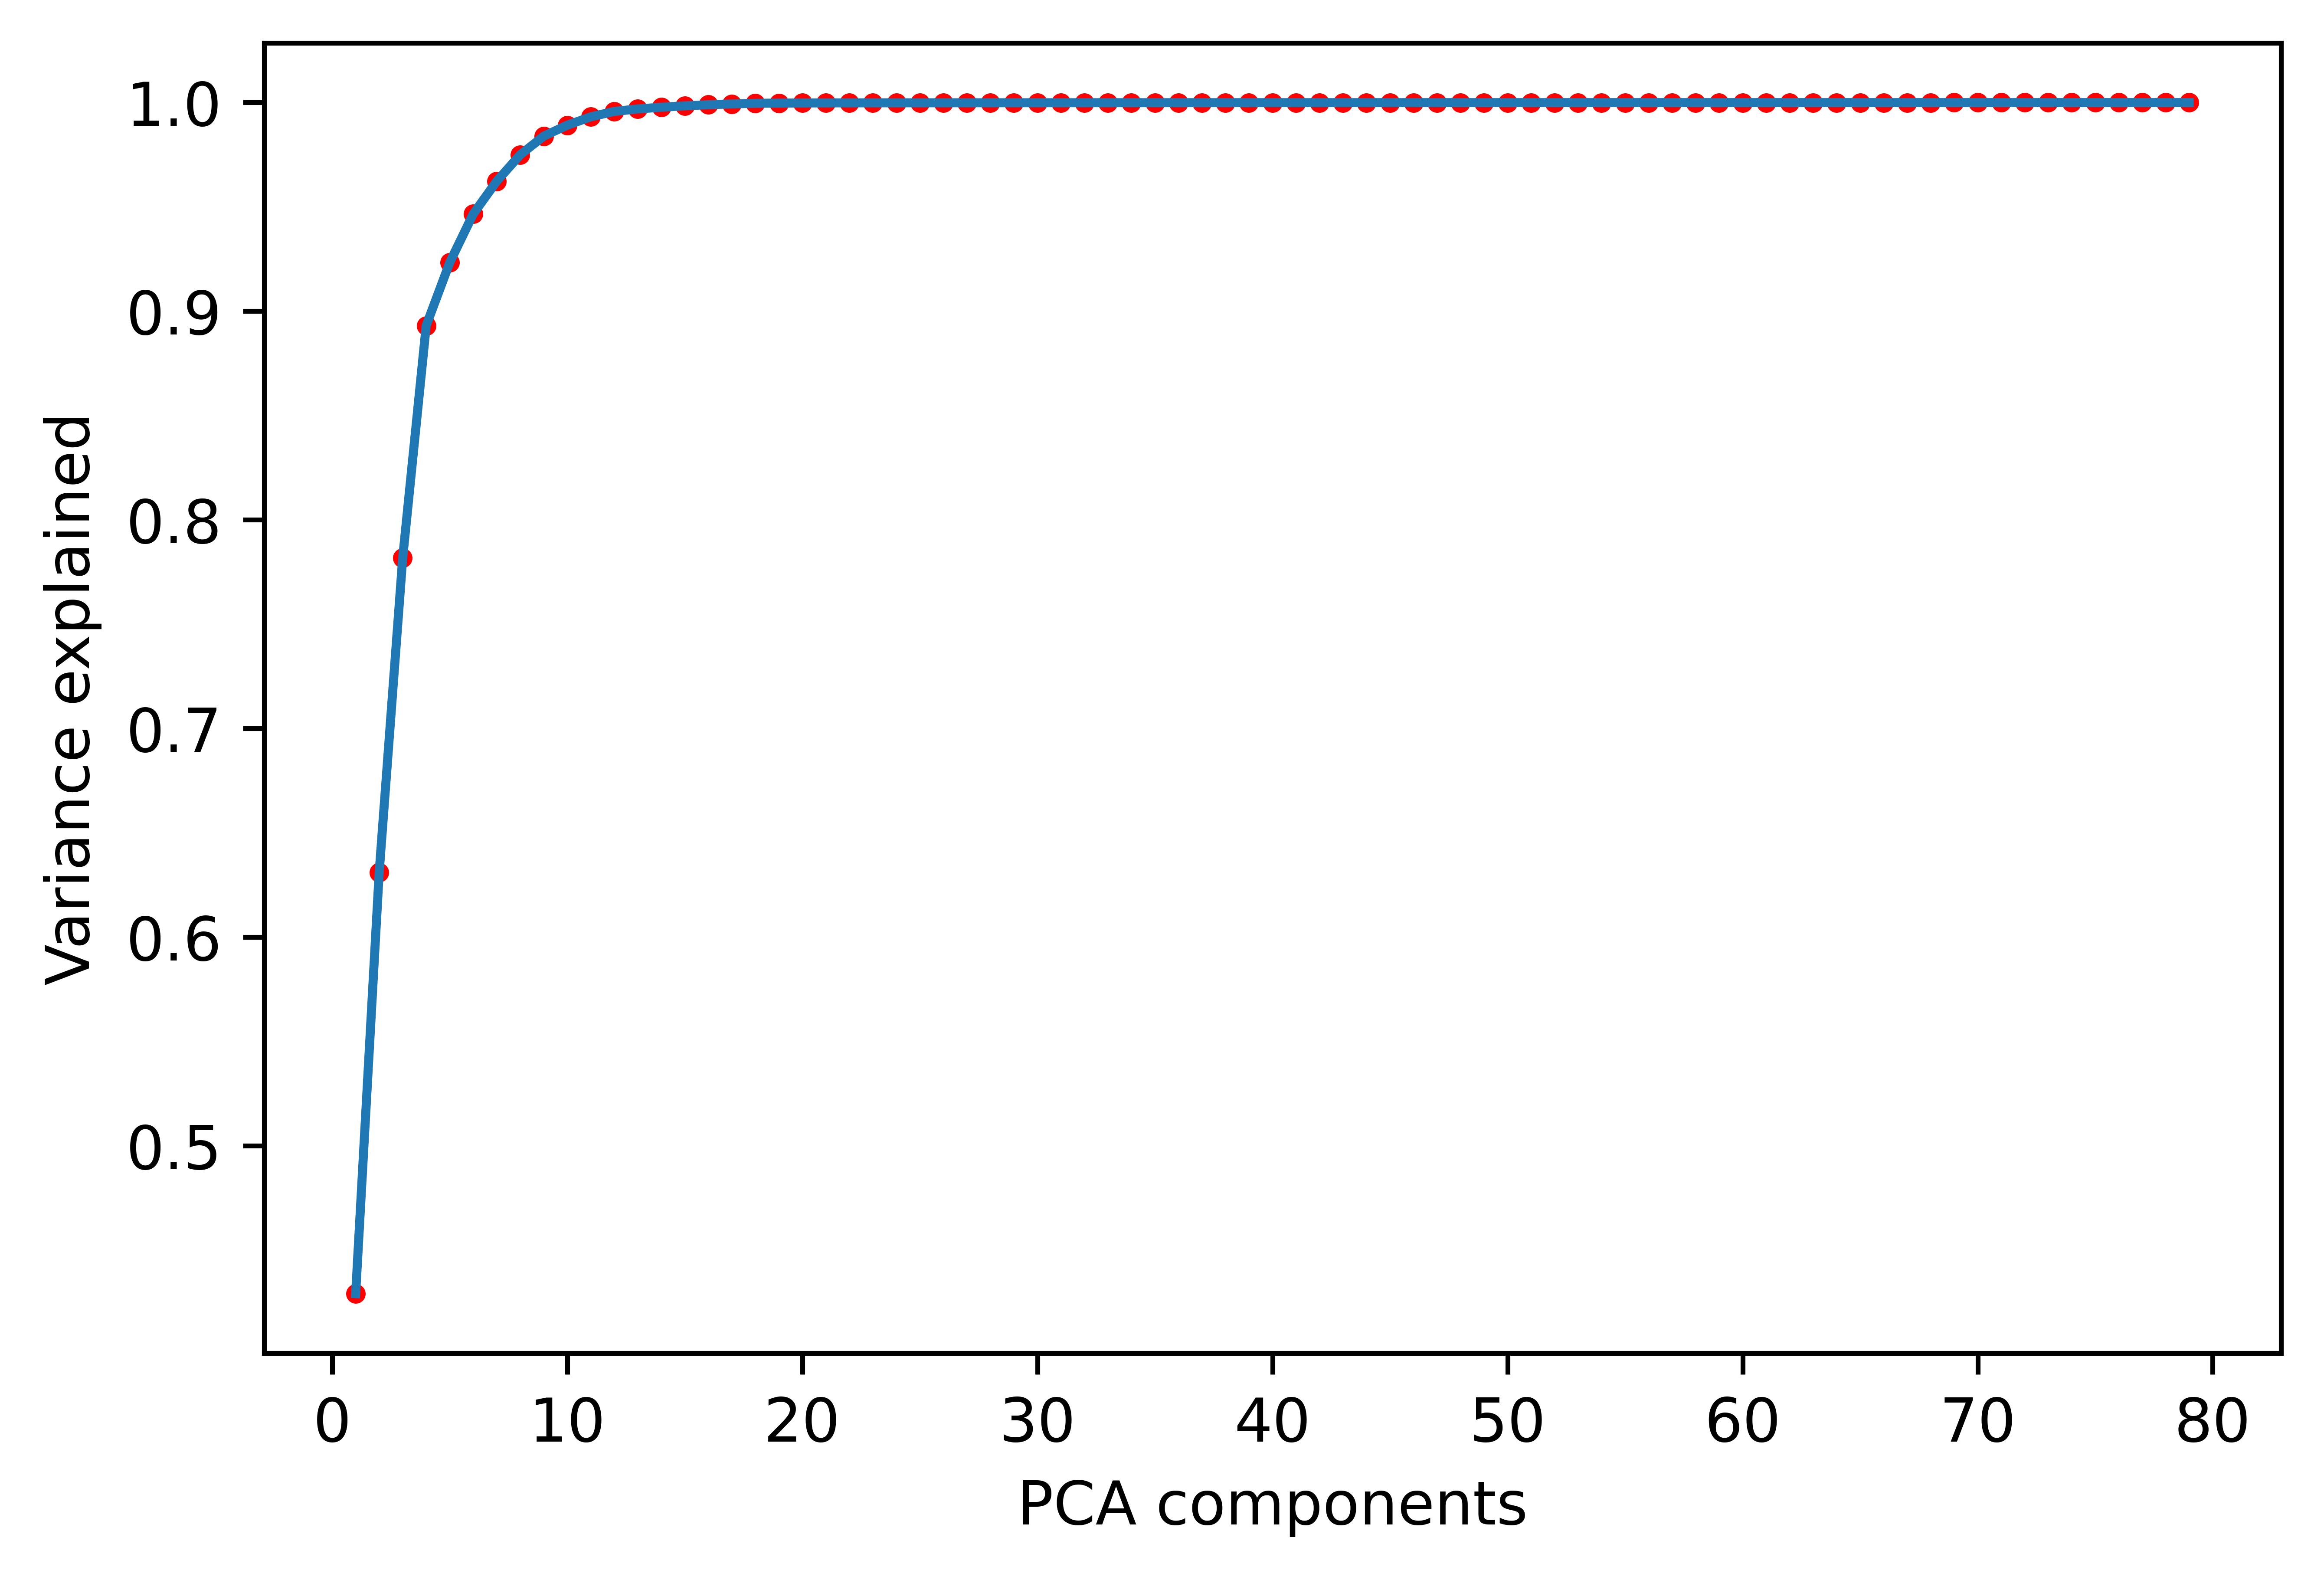

In [41]:
#Visualizations: PCA 1 dimension

from sklearn.decomposition import PCA

#fix data
data = df.drop('SalePrice',axis=1).to_numpy()

#1 dimension projection
model = PCA(n_components = 1).fit(data) 
dim2 = model.transform(data)

fig = plt.figure()
plt.scatter(dim2,df['SalePrice'].to_numpy())
plt.xlabel('Features reduced to 1 dimension')
plt.ylabel('Sale Price')
print('variance explained 1d: ',sum(model.explained_variance_ratio_))


#2 dimensions projection
model = PCA(n_components = 2).fit(data) 
dim3 = model.transform(data)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(dim3[:,0],dim3[:,1],df['SalePrice'].to_numpy())      #potential mistake in z axis ???
plt.xlabel('1st PCA dimension')
plt.ylabel('2nd PCA dimension')
ax.set_zlabel('Sale Price')
print('variance explained 2d: ',sum(model.explained_variance_ratio_))



#Plot scree graph
variance_explained = []
for n in range(1,data.shape[1]+1):
    model = PCA(n_components = n).fit(data)
    variance_explained.append(sum(model.explained_variance_ratio_))
    
fig =plt.figure(dpi =1000)
x = np.linspace(1,data.shape[1],data.shape[1])
plt.plot(x,variance_explained)
plt.scatter(x,variance_explained,s=5, color = 'red')
plt.xlabel('PCA components')
plt.ylabel('Variance explained')

In [11]:
# T-Sne visualization

from sklearn.manifold import TSNE

C:\Users\nickh\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\nickh\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\nickh\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\nickh\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\nickh\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnin

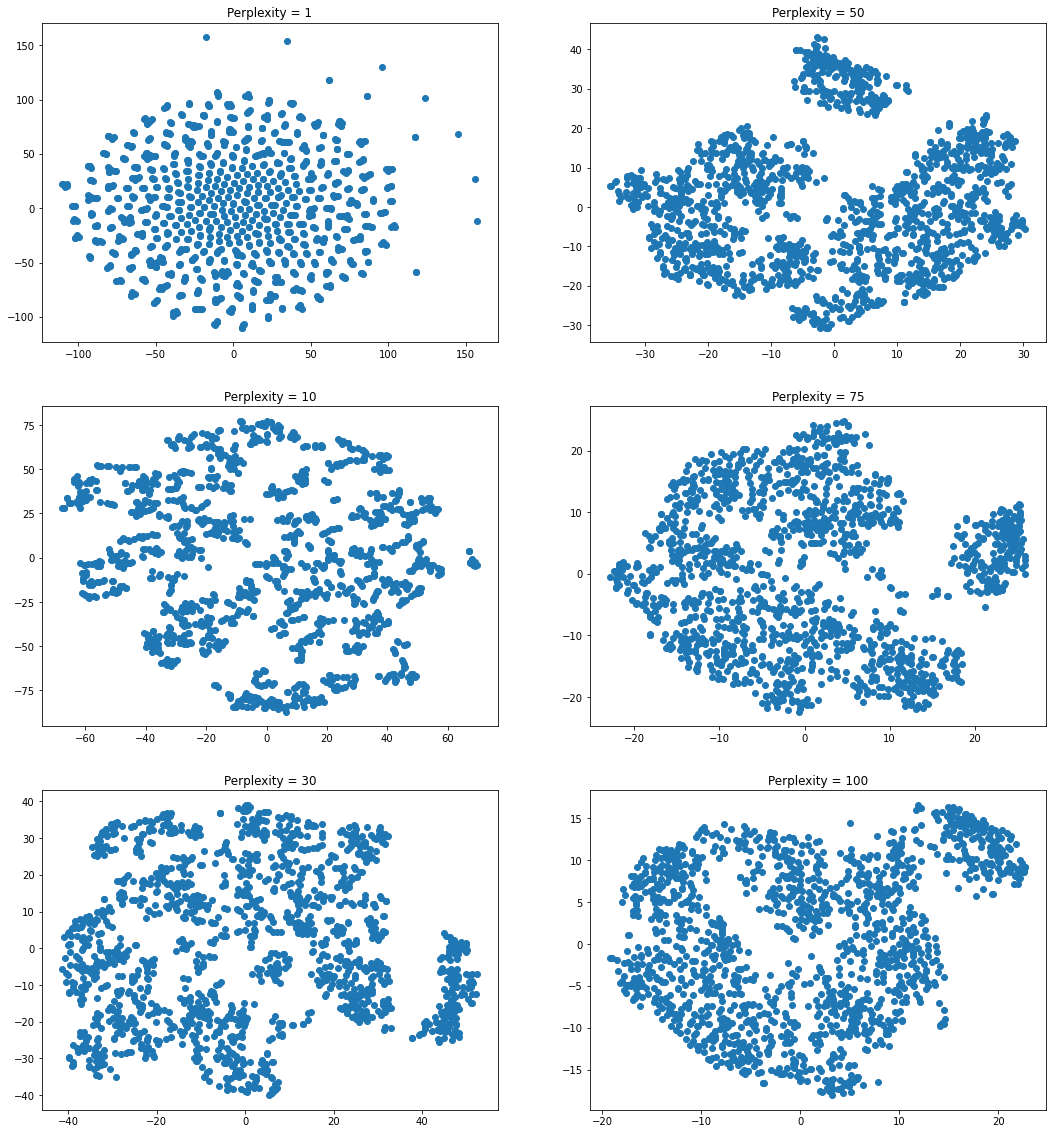

In [37]:
#fix data
data = df.drop('SalePrice',axis=1).to_numpy()

fig, axs = plt.subplots(3,2,figsize=(18,20))
count = 0

for perplexity in [1,10,30]:
    
    data_transformed = TSNE(n_components = 2, perplexity = perplexity ).fit_transform(data)
    axs[count,0].scatter(data_transformed[:,0],data_transformed[:,1])
    axs[count,0].title.set_text(f'Perplexity = {perplexity}')
    count+=1
    
    
count = 0

for perplexity in [50,75,100]:
    
    data_transformed = TSNE(n_components = 2, perplexity = perplexity ).fit_transform(data)
    axs[count,1].scatter(data_transformed[:,0],data_transformed[:,1])
    axs[count,1].title.set_text(f'Perplexity = {perplexity}')
    count+=1

In [49]:
price = df['SalePrice'].to_numpy()
data_transformed = TSNE(n_components = 2, perplexity = 50 ).fit_transform(data)


C:\Users\nickh\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\nickh\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


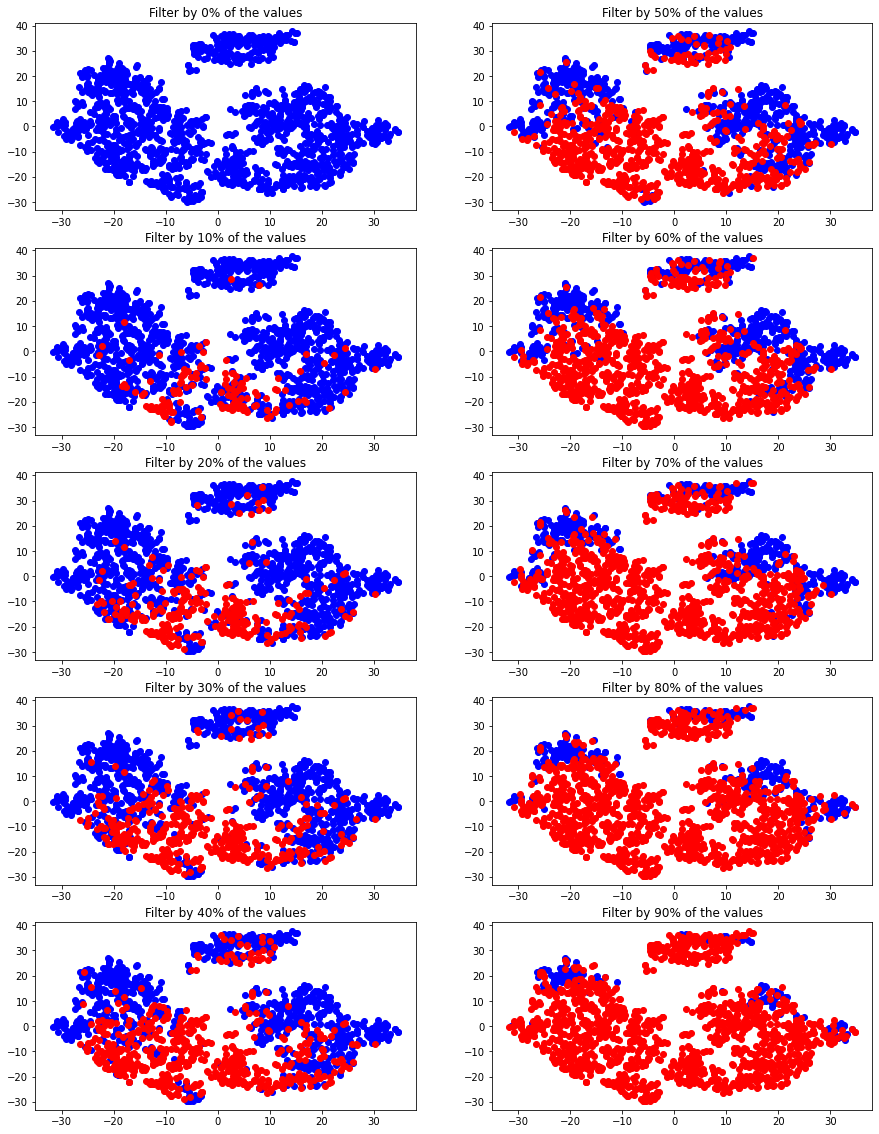

In [50]:
fig, axs = plt.subplots(5,2,figsize=(15,20))  
count =0
for percent in range(0,50,10):
    
    bluex = []
    bluey = []
    redx = []
    redy = []
    for i in range(len(price)):
        if price[i]>= np.percentile(price,percent):
            bluex.append(data_transformed[i][0])
            bluey.append(data_transformed[i][1])
        else:
            redx.append(data_transformed[i][0])
            redy.append(data_transformed[i][1])

    axs[count,0].scatter(bluex,bluey,color = 'blue')
    axs[count,0].scatter(redx,redy,color = 'red')
    axs[count,0].title.set_text(f'Filter by {percent}% of the values')
    count+=1
    

count =0
for percent in range(50,100,10):
    
    bluex = []
    bluey = []
    redx = []
    redy = []
    for i in range(len(price)):
        if price[i]>= np.percentile(price,percent):
            bluex.append(data_transformed[i][0])
            bluey.append(data_transformed[i][1])
        else:
            redx.append(data_transformed[i][0])
            redy.append(data_transformed[i][1])

    axs[count,1].scatter(bluex,bluey,color = 'blue')
    axs[count,1].scatter(redx,redy,color = 'red')
    axs[count,1].title.set_text(f'Filter by {percent}% of the values')
    count+=1
        
